   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null

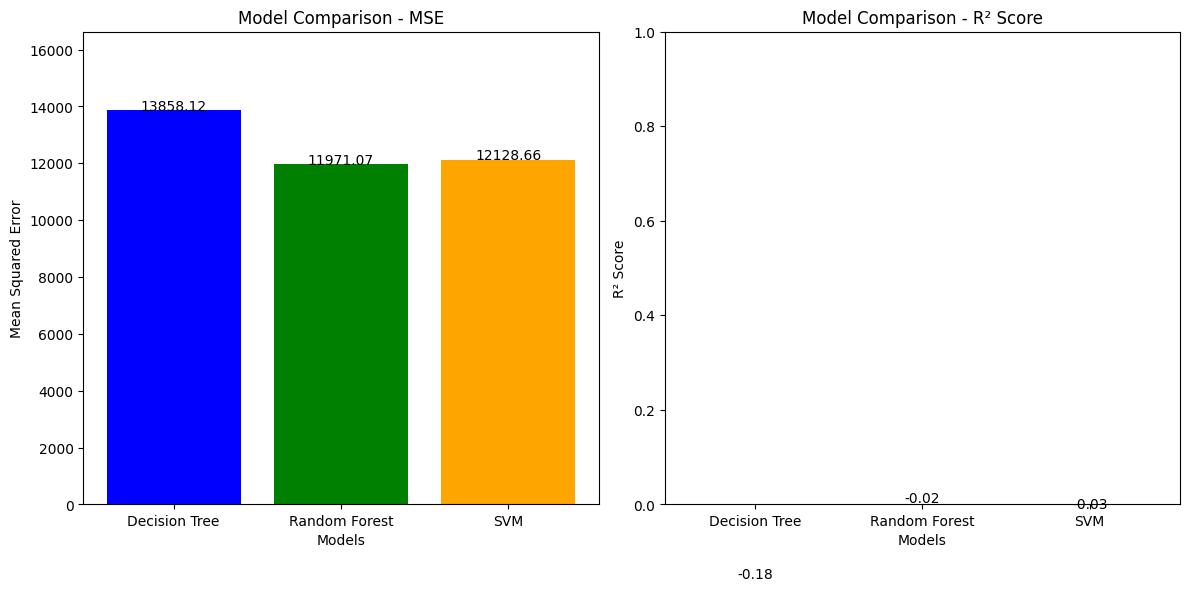

KeyError: 'date'

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('forestfires.csv')
print(df.head())
print(df.info())  # Understand data structure
print(df.isnull().sum())
df = pd.get_dummies(df, columns=['month', 'day'], drop_first=True)
X = df.drop(['area'], axis=1)  # Features
y = df['area']                # Target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree MSE: {dt_mse}, R2 Score: {dt_r2}")
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MSE: {dt_mse}, R2 Score: {dt_r2}")
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM MSE: {dt_mse}, R2 Score: {dt_r2}")
models = ['Decision Tree', 'Random Forest', 'SVM']
mse_scores = [dt_mse, rf_mse, svm_mse]
r2_scores = [dt_r2, rf_r2, svm_r2]

for i, model in enumerate(models):
    print(f"{model}: MSE = {mse_scores[i]}, R2 Score = {r2_scores[i]}")

import joblib

joblib.dump(rf_model, 'best_forest_fire_model.joblib')
import matplotlib.pyplot as plt
import numpy as np

# Model Names
models = ['Decision Tree', 'Random Forest', 'SVM']

# Example MSE and R² Scores (replace these with your calculated values)
mse_scores = [dt_mse, rf_mse, svm_mse]
r2_scores = [dt_r2, rf_r2, svm_r2]

# Plot MSE
plt.figure(figsize=(12, 6))

# Bar plot for MSE
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color=['blue', 'green', 'orange'])
plt.title("Model Comparison - MSE")
plt.ylabel("Mean Squared Error")
plt.xlabel("Models")
plt.ylim([0, max(mse_scores) * 1.2])
for i, v in enumerate(mse_scores):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

# Bar plot for R² Score
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.ylim([0, 1])
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

# Show the plots
plt.tight_layout()
plt.show()

df['fire_occurrence'] = ((df['temp'] > 30) & (df['RH'] < 40)).astype(int)
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['day_of_year'] = df['date'].dt.dayofyear
df['season'] = df['month'].apply(lambda x: 0 if x in [12, 1, 2] else 
                                                1 if x in [3, 4, 5] else 
                                                2 if x in [6, 7, 8] else 
                                                3)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df[['month', 'day', 'year', 'season', 'day_of_year']]
y = df['fire_occurrence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Save the model
import joblib
joblib.dump(clf, 'fire_occurrence_model2.joblib')
